In [1]:
## imports 
import pandas as pd
import numpy as np
import yaml
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# comment these out if you don't have plotnine--not essential here/only used once
import plotnine
from plotnine import *

## way to connect to mysql 
## if you need to install
## uncomment this line:
#! pip install mysql-connector-python
import mysql.connector

## print mult
## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## function to feed path name to load
## credentials
def load_creds(path: str):
    with open(path, 'r') as stream:
        try:
            creds = yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            print(exc)
    return(creds)


# 0. Preliminary: define connection and read sample of data

In [2]:
creds = load_creds("../11_db_cred.yaml")

In [3]:
## connect to the database
cnx = mysql.connector.connect(user=creds['practice_database']['user'], 
                            password=creds['practice_database']['password'],
                            port=creds['practice_database']['port'],
                            database= creds['practice_database']['database'],
                            host = creds['practice_database']['host'])
cnx

In [4]:
## define a query to pull first 5 rows
## from caseinit table
sample_case_q = """ select * 
from caseinit 
limit 5
"""

In [5]:
## feed read sql query the query
## and my database connection
read_sample_d = pd.read_sql_query(sample_case_q, cnx)
print(type(read_sample_d))
## print columns
print(read_sample_d.columns)
read_sample_d

<class 'pandas.core.frame.DataFrame'>
Index(['CASE_ID', 'CASE_PARTICIPANT_ID', 'RECEIVED_DATE', 'OFFENSE_CATEGORY',
       'PRIMARY_CHARGE_FLAG', 'CHARGE_ID', 'CHARGE_VERSION_ID',
       'DISPOSITION_CHARGED_OFFENSE_TITLE', 'CHARGE_COUNT', 'DISPOSITION_DATE',
       'DISPOSITION_CHARGED_CHAPTER', 'DISPOSITION_CHARGED_ACT',
       'DISPOSITION_CHARGED_SECTION', 'DISPOSITION_CHARGED_CLASS',
       'DISPOSITION_CHARGED_AOIC', 'CHARGE_DISPOSITION',
       'CHARGE_DISPOSITION_REASON', 'SENTENCE_JUDGE', 'SENTENCE_COURT_NAME',
       'SENTENCE_COURT_FACILITY', 'SENTENCE_PHASE', 'SENTENCE_DATE',
       'SENTENCE_TYPE', 'CURRENT_SENTENCE_FLAG', 'COMMITMENT_TYPE',
       'COMMITMENT_TERM', 'COMMITMENT_UNIT', 'LENGTH_OF_CASE_in_Days',
       'AGE_AT_INCIDENT', 'RACE', 'GENDER', 'INCIDENT_CITY',
       'INCIDENT_BEGIN_DATE', 'INCIDENT_END_DATE', 'LAW_ENFORCEMENT_AGENCY',
       'LAW_ENFORCEMENT_UNIT', 'ARREST_DATE', 'FELONY_REVIEW_DATE',
       'FELONY_REVIEW_RESULT', 'ARRAIGNMENT_DATE', 'UPDATED_

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY,is_in_diversion
0,198055620664,85937621020,08/15/1984 12:00:00 AM,PROMIS Conversion,False,1242195814523,155656315869,FIRST DEGREE MURDER,2,12/17/2014 12:00:00 AM,...,08/09/1984 12:00:00 AM,,CHICAGO POLICE DEPT,,08/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,09/21/1984 12:00:00 AM,PROMIS Conversion,False
1,198055620664,85937621020,08/15/1984 12:00:00 AM,PROMIS Conversion,False,1242198287388,131513547452,HOME INVASION,14,12/17/2014 12:00:00 AM,...,08/09/1984 12:00:00 AM,,CHICAGO POLICE DEPT,,08/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,09/21/1984 12:00:00 AM,PROMIS Conversion,False
2,198055620664,85937621020,08/15/1984 12:00:00 AM,PROMIS Conversion,False,1242351605056,176626576281,FIRST DEGREE MURDER,4,12/17/2014 12:00:00 AM,...,08/09/1984 12:00:00 AM,,CHICAGO POLICE DEPT,,08/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,09/21/1984 12:00:00 AM,PROMIS Conversion,False
3,198055620664,85937621020,08/15/1984 12:00:00 AM,PROMIS Conversion,False,1242352841488,176617824190,FIRST DEGREE MURDER,5,12/17/2014 12:00:00 AM,...,08/09/1984 12:00:00 AM,,CHICAGO POLICE DEPT,,08/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,09/21/1984 12:00:00 AM,PROMIS Conversion,False
4,198055620664,85937621020,08/15/1984 12:00:00 AM,PROMIS Conversion,False,1242356550787,131238606761,HOME INVASION,13,12/17/2014 12:00:00 AM,...,08/09/1984 12:00:00 AM,,CHICAGO POLICE DEPT,,08/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,09/21/1984 12:00:00 AM,PROMIS Conversion,False


# 1. Row and column filtering

In [6]:
## 1.1 Pulling columns

In [7]:
## select specific columns
pull_id_q = """
select CASE_ID, CASE_PARTICIPANT_ID
from caseinit
"""

id_d = pd.read_sql_query(pull_id_q,
                             cnx)
id_d.head()

,CASE_ID,CASE_PARTICIPANT_ID
0,198055620664,85937621020
1,198055620664,85937621020
2,198055620664,85937621020
3,198055620664,85937621020
4,198055620664,85937621020


## 1.2 subsetting rows

In [8]:
## select specific rows using where
pull_id_age_q = """
select CASE_ID, CASE_PARTICIPANT_ID, 
AGE_AT_INCIDENT
from caseinit
where AGE_AT_INCIDENT > 40
"""

id_age = pd.read_sql_query(pull_id_age_q,
                cnx)
id_age.head()

,CASE_ID,CASE_PARTICIPANT_ID,AGE_AT_INCIDENT
0,205411772533,106247326235,49.0
1,208597923533,114147409332,43.0
2,209306582865,122563667565,47.0
3,209754034523,117614073313,48.0
4,210275284632,117990102885,45.0


In [9]:
## select specific rows using IN
pull_id_r_q = """
select CASE_ID, CASE_PARTICIPANT_ID, 
RACE
from caseinit
where RACE in ("Black", "HISPANIC")
"""

id_r = pd.read_sql_query(pull_id_r_q,
                cnx)
id_r.RACE.value_counts()

## select specific rows using similarity
pull_id_r_q_2 = """
select CASE_ID, CASE_PARTICIPANT_ID, 
RACE
from caseinit
where RACE like '%Black%'
"""

id_r = pd.read_sql_query(pull_id_r_q_2,
                cnx)
id_r.RACE.value_counts()

Black       181219
HISPANIC      6098
Name: RACE, dtype: int64

Black                               181219
White/Black [Hispanic or Latino]      1408
Name: RACE, dtype: int64

## 1.3 Creating new columns

In [10]:
## create new col 
## using case when logic
compare_charge_q = """
select *,
CASE 
    WHEN OFFENSE_CATEGORY = UPDATED_OFFENSE_CATEGORY THEN 'Same offense'
    ELSE 'Diff offense'
END as charge_update
from caseinit
"""

compare_charge_d = pd.read_sql_query(compare_charge_q, cnx)

compare_charge_d.charge_update.value_counts()
samp = compare_charge_d.groupby('charge_update').sample(n = 2, random_state = 919)
samp[['OFFENSE_CATEGORY', 'UPDATED_OFFENSE_CATEGORY', 'charge_update']]

Same offense    239276
Diff offense     33018
Name: charge_update, dtype: int64

,OFFENSE_CATEGORY,UPDATED_OFFENSE_CATEGORY,charge_update
214095,DUI,Aggravated DUI,Diff offense
14131,Aggravated Battery Police Officer,Disarming Police Officer,Diff offense
75493,Burglary,Burglary,Same offense
161184,Narcotics,Narcotics,Same offense


## 1.4 Code that deliberately throws error due to creating var in same step as row filter

In [6]:
## create new col 
## using case when logic
## and then row filter
## throws error bc doesn't
## know that charge_update exists
compare_charge_filt_q = """
select *,
CASE 
WHEN OFFENSE_CATEGORY = UPDATED_OFFENSE_CATEGORY THEN 'Same offense'
    ELSE 'Diff offense'
END as charge_update
from caseinit
where charge_update = 'Diff offense'
"""

compare_charge_filt_d = pd.read_sql_query(compare_charge_filt_q, cnx)


/home/jhaber/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy


DatabaseError: Execution failed on sql '
select *,
CASE 
WHEN OFFENSE_CATEGORY = UPDATED_OFFENSE_CATEGORY THEN 'Same offense'
    ELSE 'Diff offense'
END as charge_update
from caseinit
where charge_update = 'Diff offense'
': 1054 (42S22): Unknown column 'charge_update' in 'where clause'

In [5]:
## row filtering using not equal syntax
compare_charge_q = """
select *
from caseinit
where OFFENSE_CATEGORY <> UPDATED_OFFENSE_CATEGORY
"""

test = pd.read_sql_query(compare_charge_q, cnx)
test[['OFFENSE_CATEGORY', 'UPDATED_OFFENSE_CATEGORY']].head()

/home/jhaber/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy


,OFFENSE_CATEGORY,UPDATED_OFFENSE_CATEGORY
0,Attempt Homicide,Domestic Battery
1,Attempt Homicide,Domestic Battery
2,Armed Violence,UUW - Unlawful Use of Weapon
3,Domestic Battery,Homicide
4,Domestic Battery,Homicide


# 2. Subqueries and aggregation: one dataset

## 2.1 Row filtering using subquery

In [13]:
## row filtering using subquery
compare_charge_sub_q = """
select *
from caseinit
inner join (select CASE_ID as cid, CASE_PARTICIPANT_ID as cpid,
CASE 
    WHEN OFFENSE_CATEGORY = UPDATED_OFFENSE_CATEGORY THEN 'Same offense'
    ELSE 'Diff offense'
END as charge_update
from caseinit) as tmp on tmp.cid = caseinit.case_ID and
                        tmp.cpid = caseinit.CASE_PARTICIPANT_ID
where charge_update = "Diff offense"
"""

diff_c = pd.read_sql_query(compare_charge_sub_q, cnx)
diff_c[['OFFENSE_CATEGORY', 'UPDATED_OFFENSE_CATEGORY', 'charge_update']].head()

,OFFENSE_CATEGORY,UPDATED_OFFENSE_CATEGORY,charge_update
0,Aggravated Battery Police Officer,UUW - Unlawful Use of Weapon,Diff offense
1,DUI,Aggravated DUI,Diff offense
2,DUI,Aggravated DUI,Diff offense
3,DUI,Aggravated DUI,Diff offense
4,DUI,Aggravated DUI,Diff offense


## 2.2 Longer example: racial disparities in who's offered diversion

-  Find the five most common offenses in the `caseinit` table
- For those five most common offenses, find the percent of Black defendants whose cases are diverted and the percent of White defendants whose cases are diverted


In [14]:
## top 5 offenses
t5 = """select UPDATED_OFFENSE_CATEGORY, count(*) as count_offense 
from caseinit where RACE in ("Black", "White") 
group by UPDATED_OFFENSE_CATEGORY
order by count_offense desc
limit 5
"""


t5_d = pd.read_sql_query(t5, cnx)
t5_d

,UPDATED_OFFENSE_CATEGORY,count_offense
0,Narcotics,62837
1,UUW - Unlawful Use of Weapon,29381
2,Retail Theft,13226
3,Burglary,10118
4,Aggravated DUI,9373


In [15]:
## filter to rows where UPDATED_OFFENSE_CATEGORY
## is in the top 5
t5_rowfilt = """
select * 
from caseinit
inner join (
select UPDATED_OFFENSE_CATEGORY as tmp_oc, count(*) as count_offense
    from caseinit
    where RACE in ("Black", "White")
    group by UPDATED_OFFENSE_CATEGORY
    order by count_offense desc
    limit 5
    ) as top5 on caseinit.UPDATED_OFFENSE_CATEGORY = top5.tmp_oc
where RACE in ("Black", "White")
"""

t5_d = pd.read_sql_query(t5_rowfilt, cnx)
t5_d.shape
t5_d.RACE.value_counts()
t5_d.UPDATED_OFFENSE_CATEGORY.value_counts()

(124935, 44)

Black    105770
White     19165
Name: RACE, dtype: int64

Narcotics                       62837
UUW - Unlawful Use of Weapon    29381
Retail Theft                    13226
Burglary                        10118
Aggravated DUI                   9373
Name: UPDATED_OFFENSE_CATEGORY, dtype: int64

In [16]:
## get diversion rates by race for white and black
## defendants 
divert_compare = """
select UPDATED_OFFENSE_CATEGORY, 
is_in_diversion, RACE, 
count(*) as count_divert,
count(*)/count_group as prop_divert
from caseinit
inner join (
    select UPDATED_OFFENSE_CATEGORY as tmp_oc, RACE as tmp_race,
    count(*) as count_group 
    from caseinit
    where RACE in ("Black", "White")
    group by UPDATED_OFFENSE_CATEGORY, RACE 
    ) as tmp on tmp.tmp_race = caseinit.RACE
and tmp.tmp_oc = caseinit.UPDATED_OFFENSE_CATEGORY
group by UPDATED_OFFENSE_CATEGORY, RACE,
is_in_diversion 
order by count_divert desc
"""

divert_compare_alloff = pd.read_sql_query(divert_compare, cnx)
divert_compare_alloff.head()


,UPDATED_OFFENSE_CATEGORY,is_in_diversion,RACE,count_divert,prop_divert
0,Narcotics,False,Black,51103,0.9367
1,UUW - Unlawful Use of Weapon,False,Black,28008,0.9979
2,Retail Theft,False,Black,8239,0.8487
3,PROMIS Conversion,False,Black,7277,1.0000
4,Narcotics,False,White,7221,0.8722


In [17]:
## combine with the top 5 filtering code
divert_compare_t5 = """
select UPDATED_OFFENSE_CATEGORY, is_in_diversion, RACE, 
count(*) as count_divert, count(*)/count_group as prop_divert
from caseinit
inner join (
    select UPDATED_OFFENSE_CATEGORY as tmp_oc, RACE as tmp_race,
    count(*) as count_group 
    from caseinit
    where RACE in ("Black", "White")
    group by UPDATED_OFFENSE_CATEGORY, RACE 
    ) as tmp on tmp.tmp_race = caseinit.RACE
    and tmp.tmp_oc = caseinit.UPDATED_OFFENSE_CATEGORY
inner join (
    select UPDATED_OFFENSE_CATEGORY as tmp_oc_t5, count(*) as count_offense
    from caseinit
    where RACE in ("Black", "White") 
    group by UPDATED_OFFENSE_CATEGORY
    order by count_offense desc
    limit 5
    ) as top5 on caseinit.UPDATED_OFFENSE_CATEGORY = top5.tmp_oc_t5
where is_in_diversion = 'True'
group by UPDATED_OFFENSE_CATEGORY, RACE,
is_in_diversion 
"""

divert_compare_t5  = pd.read_sql_query(divert_compare_t5, cnx)
divert_compare_t5


,UPDATED_OFFENSE_CATEGORY,is_in_diversion,RACE,count_divert,prop_divert
0,Aggravated DUI,True,White,11,0.0033
1,UUW - Unlawful Use of Weapon,True,Black,58,0.0021
2,Retail Theft,True,White,614,0.1745
3,Retail Theft,True,Black,1469,0.1513
4,Narcotics,True,Black,3455,0.0633
5,Burglary,True,Black,358,0.0482
6,Burglary,True,White,219,0.0813
7,Narcotics,True,White,1058,0.1278
8,UUW - Unlawful Use of Weapon,True,White,9,0.0068
9,Aggravated DUI,True,Black,25,0.0042


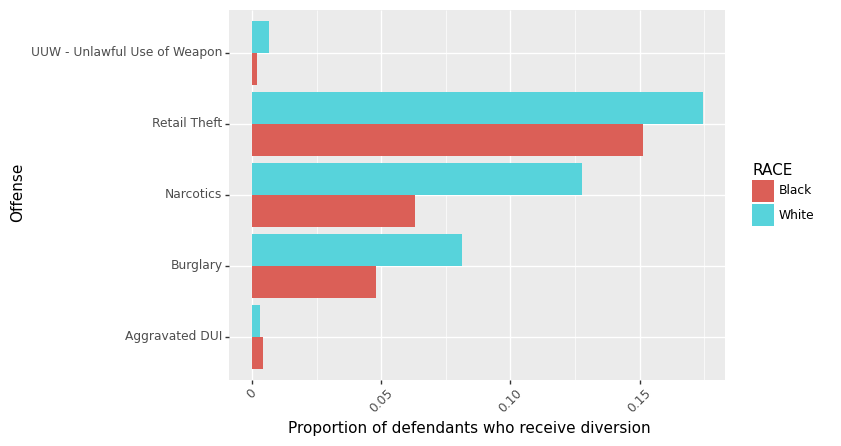

<ggplot: (8757992279016)>

In [18]:
(ggplot(divert_compare_t5, aes(x = 'UPDATED_OFFENSE_CATEGORY', y = 'prop_divert',
                              group = 'RACE', fill = 'RACE')) +
geom_bar(stat = "identity", position = "dodge") +
ylab("Proportion of defendants who receive diversion")+
xlab("Offense") +
theme(axis_text_x = element_text(angle = 45)) +
coord_flip())

# 3. Subqueries and aggregations: two datasets

## 3.1 Looking at structure of diversions dataset

In [19]:
## define a query to pull first 5 rows
## from caseinit table
sample_div_q = """
select * 
from divert 
limit 5
"""

divert_res = pd.read_sql_query(sample_div_q, cnx)
divert_res.head()
divert_res.columns

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,DIVERSION_PROGRAM,REFERRAL_DATE,DIVERSION_COUNT,PRIMARY_CHARGE_OFFENSE_TITLE,STATUTE,RACE,GENDER,DIVERSION_RESULT,DIVERSION_CLOSED_DATE
0,506061999169,347644693595,01/01/2011 12:00:00 AM,Retail Theft,DS,06/17/2013 12:00:00 AM,2,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,Graduated,06/17/2013 12:00:00 AM
1,506061999169,347644693595,01/01/2011 12:00:00 AM,Retail Theft,VC,08/11/2011 12:00:00 AM,1,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,,
2,506066271711,347649309720,01/02/2011 12:00:00 AM,Retail Theft,MHC,09/14/2012 12:00:00 AM,1,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,Failed,09/14/2012 12:00:00 AM
3,506071709491,347654941393,01/03/2011 12:00:00 AM,Narcotics,MHC,07/27/2018 12:00:00 AM,1,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,720 ILCS 570/401(d)(i),Black,Female,,
4,506071709491,347654987555,01/03/2011 12:00:00 AM,Narcotics,MHC,07/27/2018 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),White,Male,,


Index(['CASE_ID', 'CASE_PARTICIPANT_ID', 'RECEIVED_DATE', 'OFFENSE_CATEGORY',
       'DIVERSION_PROGRAM', 'REFERRAL_DATE', 'DIVERSION_COUNT',
       'PRIMARY_CHARGE_OFFENSE_TITLE', 'STATUTE', 'RACE', 'GENDER',
       'DIVERSION_RESULT', 'DIVERSION_CLOSED_DATE'],
      dtype='object')

## 3.2 Left joining certain cols from caseinit onto diversions

### Left join with everything from divert; certain cols from caseinit

In [20]:
lj_q = """
select divert.*,
AGE_AT_INCIDENT, LAW_ENFORCEMENT_AGENCY,
INCIDENT_CITY 
from divert
LEFT JOIN caseinit
ON divert.CASE_ID = caseinit.CASE_ID
AND divert.CASE_PARTICIPANT_ID = caseinit.CASE_PARTICIPANT_ID
"""

In [21]:
lj_d = pd.read_sql_query(lj_q, cnx)
lj_d.head()
lj_d.shape
lj_d.columns

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,DIVERSION_PROGRAM,REFERRAL_DATE,DIVERSION_COUNT,PRIMARY_CHARGE_OFFENSE_TITLE,STATUTE,RACE,GENDER,DIVERSION_RESULT,DIVERSION_CLOSED_DATE,AGE_AT_INCIDENT,LAW_ENFORCEMENT_AGENCY,INCIDENT_CITY
0,507323758467,348994448649,02/24/2011 12:00:00 AM,Narcotics,DS,03/16/2011 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),Black,Male,Graduated,07/22/2011 12:00:00 AM,None,None,None
1,507920360678,349624088148,03/18/2011 12:00:00 AM,Narcotics,DS,04/13/2011 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),Biracial,Female,,,37.0,CHICAGO PD,Chicago
2,508118645462,349817549962,03/25/2011 12:00:00 AM,Credit Card Cases,BR9,03/21/2012 12:00:00 AM,1,MISUSE CREDIT CARD <$300,720 ILCS 250/8,Latinx,Female,Graduated,03/21/2012 12:00:00 AM,None,None,None
3,508232644648,349936830641,03/30/2011 12:00:00 AM,Narcotics,DS,05/02/2011 12:00:00 AM,1,POSSESSION OF CANNABIS,720 ILCS 550/4(d),Black,Male,Graduated,09/02/2011 12:00:00 AM,None,None,None
4,508661258280,350393734729,04/15/2011 12:00:00 AM,Retail Theft,VC,03/23/2012 12:00:00 AM,1,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,Graduated,05/24/2013 12:00:00 AM,None,None,None


(27902, 16)

Index(['CASE_ID', 'CASE_PARTICIPANT_ID', 'RECEIVED_DATE', 'OFFENSE_CATEGORY',
       'DIVERSION_PROGRAM', 'REFERRAL_DATE', 'DIVERSION_COUNT',
       'PRIMARY_CHARGE_OFFENSE_TITLE', 'STATUTE', 'RACE', 'GENDER',
       'DIVERSION_RESULT', 'DIVERSION_CLOSED_DATE', 'AGE_AT_INCIDENT',
       'LAW_ENFORCEMENT_AGENCY', 'INCIDENT_CITY'],
      dtype='object')

### Deliberate error- selecting RACE col from both

In [7]:
lj_dup_q = """
select divert.*,
AGE_AT_INCIDENT, LAW_ENFORCEMENT_AGENCY,
INCIDENT_CITY, RACE
from divert
LEFT JOIN caseinit
ON divert.CASE_ID = caseinit.CASE_ID
AND divert.CASE_PARTICIPANT_ID = caseinit.CASE_PARTICIPANT_ID
"""

In [8]:
lj_d_dup = pd.read_sql_query(lj_dup_q, cnx)


DatabaseError: Execution failed on sql '
select divert.*,
AGE_AT_INCIDENT, LAW_ENFORCEMENT_AGENCY,
INCIDENT_CITY, RACE
from divert
LEFT JOIN caseinit
ON divert.CASE_ID = caseinit.CASE_ID
AND divert.CASE_PARTICIPANT_ID = caseinit.CASE_PARTICIPANT_ID
': 1052 (23000): Column 'RACE' in field list is ambiguous

### Fixing that error - aliasing race column (temporary rename)

In [24]:
lj_dupfix_q = """
select divert.*,
AGE_AT_INCIDENT, LAW_ENFORCEMENT_AGENCY,
INCIDENT_CITY, caseinit.RACE as caseinit_race
from divert
LEFT JOIN caseinit
ON divert.CASE_ID = caseinit.CASE_ID
AND divert.CASE_PARTICIPANT_ID = caseinit.CASE_PARTICIPANT_ID
"""

In [25]:
lj_d_dupfix = pd.read_sql_query(lj_dupfix_q, cnx)

In [26]:
## only diff is that in diversion dataset
## they have the category Latinx
## while in case initiations that's Hispanic or 
## White hispanic/latino
pd.crosstab(lj_d_dupfix.RACE, lj_d_dupfix.caseinit_race)

caseinit_race,,American Indian,Asian,Biracial,Black,HISPANIC,Unknown,White,White [Hispanic or Latino],White/Black [Hispanic or Latino]
RACE,,,,,,,,,,
Asian,0,0,78,0,0,0,0,0,0,0
Biracial,0,0,0,1,0,0,0,0,0,57
Black,0,0,0,0,7037,0,0,0,0,0
Latinx,0,0,0,0,0,82,0,0,1169,0
Other,0,4,0,0,0,0,0,0,0,0
Unknown,55,0,0,0,0,0,16,0,0,0
White,0,0,0,0,0,0,0,2736,0,0


### Aliasing the tables in the join

In [27]:
lj_alias_q = """
select d.*,
AGE_AT_INCIDENT, LAW_ENFORCEMENT_AGENCY,
INCIDENT_CITY, c.RACE as caseinit_race
from divert as d
LEFT JOIN caseinit as c
ON d.CASE_ID = c.CASE_ID
AND d.CASE_PARTICIPANT_ID = c.CASE_PARTICIPANT_ID
"""

In [28]:
lj_alias_d = pd.read_sql_query(lj_alias_q, cnx)

# 4. Combining agg and join

Task: among the cases that are diverted, for each of the charges (`UPDATED_OFFENSE_CATEGORY`) in the case initiations, find the percentage of defendants with that charge going to each `DIVERSION_PROGRAM`

### First part: count of offenses by diversion program

In [29]:
offenses_byprogram = """
select count(*) as count_offenses_byprogram,
UPDATED_OFFENSE_CATEGORY, DIVERSION_PROGRAM
from divert 
INNER JOIN caseinit 
ON divert.CASE_ID = caseinit.CASE_ID
AND divert.CASE_PARTICIPANT_ID = caseinit.CASE_PARTICIPANT_ID
group by UPDATED_OFFENSE_CATEGORY, DIVERSION_PROGRAM
order by count_offenses_byprogram desc
"""

In [30]:
cp = pd.read_sql_query(offenses_byprogram, cnx)
cp.head()

cp[cp.UPDATED_OFFENSE_CATEGORY == "Narcotics"]

,count_offenses_byprogram,UPDATED_OFFENSE_CATEGORY,DIVERSION_PROGRAM
0,2149,Narcotics,DC
1,1026,Retail Theft,DC
2,862,Retail Theft,MHC
3,752,Narcotics,DS
4,676,Narcotics,ARI


,count_offenses_byprogram,UPDATED_OFFENSE_CATEGORY,DIVERSION_PROGRAM
0,2149,Narcotics,DC
3,752,Narcotics,DS
4,676,Narcotics,ARI
5,618,Narcotics,DDPP
6,572,Narcotics,MHC
7,466,Narcotics,ACT
11,191,Narcotics,BR9
14,169,Narcotics,VC
59,17,Narcotics,RJCC
62,15,Narcotics,SEED


### Second part: count of offenses total

In [31]:
offenses_total = """
select count(*) as count_offenses_total,
UPDATED_OFFENSE_CATEGORY
from divert as d
INNER JOIN caseinit as c
ON d.CASE_ID = c.CASE_ID
AND d.CASE_PARTICIPANT_ID = c.CASE_PARTICIPANT_ID
group by UPDATED_OFFENSE_CATEGORY
order by count_offenses_total desc
"""

In [32]:
c = pd.read_sql_query(offenses_total, cnx)
c.head()

## check that total matches sum from first query- see both are 520 
cp.count_offenses_byprogram[cp.UPDATED_OFFENSE_CATEGORY == "Narcotics"].sum()

,count_offenses_total,UPDATED_OFFENSE_CATEGORY
0,5625,Narcotics
1,2497,Retail Theft
2,742,Burglary
3,427,Theft
4,218,Forgery


5625

### Combining into one query 

Put the numerator into a subquery and do the proportions in the outer query. We add the second inner join to make sure that when we get the denominator from the outer part, we're restricting to defendants sent to diversion

In [33]:
offenses_prop = """
select 
count_offenses_byprogram/count(*) as prop_offenses_byprogram,
caseinit.UPDATED_OFFENSE_CATEGORY,
DIVERSION_PROGRAM
from caseinit
inner join (select count(*) as count_offenses_byprogram,
UPDATED_OFFENSE_CATEGORY, DIVERSION_PROGRAM
from divert 
INNER JOIN caseinit 
ON divert.CASE_ID = caseinit.CASE_ID
AND divert.CASE_PARTICIPANT_ID = caseinit.CASE_PARTICIPANT_ID
group by UPDATED_OFFENSE_CATEGORY, DIVERSION_PROGRAM) as num
on num.UPDATED_OFFENSE_CATEGORY = caseinit.UPDATED_OFFENSE_CATEGORY
inner join (select CASE_ID as cid,
CASE_PARTICIPANT_ID as cpid
from divert
) as ppl_divert
on caseinit.CASE_ID = ppl_divert.cid
and caseinit.CASE_PARTICIPANT_ID = ppl_divert.cpid
group by caseinit.UPDATED_OFFENSE_CATEGORY, DIVERSION_PROGRAM
"""

## note: check the denom

In [34]:
cd_prop = pd.read_sql_query(offenses_prop, cnx)



In [35]:
cd_prop.head()
cd_prop[cd_prop.UPDATED_OFFENSE_CATEGORY == "Narcotics"]

## confirm with above counts- see ddpp matches up! :)
prop_ddpp = cp.count_offenses_byprogram[(cp.UPDATED_OFFENSE_CATEGORY == "Narcotics") &
                                       (cp.DIVERSION_PROGRAM == "DDPP")].iloc[0]/ \
            c.count_offenses_total[c.UPDATED_OFFENSE_CATEGORY == "Narcotics"].iloc[0]
prop_ddpp

,prop_offenses_byprogram,UPDATED_OFFENSE_CATEGORY,DIVERSION_PROGRAM
0,0.0485,Retail Theft,VC
1,0.0044,Retail Theft,DS
2,0.3452,Retail Theft,MHC
3,0.1017,Narcotics,MHC
4,0.1337,Narcotics,DS


,prop_offenses_byprogram,UPDATED_OFFENSE_CATEGORY,DIVERSION_PROGRAM
3,0.1017,Narcotics,MHC
4,0.1337,Narcotics,DS
5,0.3820,Narcotics,DC
7,0.1202,Narcotics,ARI
10,0.0340,Narcotics,BR9
14,0.0300,Narcotics,VC
94,0.0828,Narcotics,ACT
98,0.1099,Narcotics,DDPP
105,0.0030,Narcotics,RJCC
117,0.0027,Narcotics,SEED


0.10986666666666667